# #1. Import packages and process data

In [1]:
#import required packages 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from pycaret import *
from pycaret.regression import *

In [2]:
#import train and test data from csv files
df_train = pd.read_csv('/Users/lincolnwhiting/Git Portfolio/Datasets/Housing_kaggle/train.csv')
test = pd.read_csv('/Users/lincolnwhiting/Git Portfolio/Datasets/Housing_kaggle/test.csv')

In [3]:
#split data into training and validation sets
train = df_train.sample(frac=0.9, random_state=123)
validation = df_train.drop(train.index)

train.reset_index(drop=True, inplace=True)
validation.reset_index(drop=True, inplace=True)
#check the shape of the data
print('Data for Modeling: ' + str(train.shape))
print('Unseen Data For Predictions: ' + str(validation.shape))

Data for Modeling: (1314, 81)
Unseen Data For Predictions: (146, 81)


In [4]:
#View data info 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1314 non-null   int64  
 1   MSSubClass     1314 non-null   int64  
 2   MSZoning       1314 non-null   object 
 3   LotFrontage    1079 non-null   float64
 4   LotArea        1314 non-null   int64  
 5   Street         1314 non-null   object 
 6   Alley          80 non-null     object 
 7   LotShape       1314 non-null   object 
 8   LandContour    1314 non-null   object 
 9   Utilities      1314 non-null   object 
 10  LotConfig      1314 non-null   object 
 11  LandSlope      1314 non-null   object 
 12  Neighborhood   1314 non-null   object 
 13  Condition1     1314 non-null   object 
 14  Condition2     1314 non-null   object 
 15  BldgType       1314 non-null   object 
 16  HouseStyle     1314 non-null   object 
 17  OverallQual    1314 non-null   int64  
 18  OverallC

In [5]:
train.head() #preview the first 5 rows of the data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,148,60,RL,NaN,9505,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,222500
1,677,70,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87000
2,1305,160,RM,32.0,3363,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,130000
3,1373,60,RL,75.0,9750,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,274300
4,1428,50,RL,60.0,10930,Pave,Grvl,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,140000


In [6]:
train.nunique() #check for unique values in each column

Id               1314
MSSubClass         15
MSZoning            5
LotFrontage       109
LotArea           985
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         618
Length: 81, dtype: int64

In [7]:
train.describe() #view summary statistics for each column

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1314.000000,1314.000000,1079.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1306.000000,1314.000000,...,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000
mean,729.633942,57.047184,70.275255,10507.006088,6.098935,5.578387,1971.374429,1984.993151,102.150842,443.657534,...,93.816591,47.091324,21.662100,3.280061,15.452816,3.065449,35.231355,6.353120,2007.818874,180583.262557
std,417.906609,42.473441,24.628581,10207.934197,1.372435,1.114341,30.215244,20.638973,178.168634,460.901377,...,123.929084,66.550584,60.845227,28.942453,55.495631,42.341109,460.306130,2.730348,1.324355,79204.773138
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,367.250000,20.000000,59.000000,7540.750000,5.000000,5.000000,1954.000000,1966.250000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,728.500000,50.000000,69.000000,9483.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,382.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163945.000000
75%,1085.750000,70.000000,80.000000,11596.000000,7.000000,6.000000,2001.000000,2004.000000,163.750000,715.500000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213497.500000
max,1459.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,523.000000,552.000000,508.000000,440.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
train.columns #view all columns in the data

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
#catagorize columns into numerical and categorical
categorical = ['MSZoning','Exterior1st','Exterior2nd','KitchenQual','Functional','SaleType',
               'Street','LotShape','LandContour','LotConfig','LandSlope','Neighborhood',
               'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl',
               'MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond',
               'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir',
               'Electrical','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive',
               'SaleCondition',]
numerical = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
              'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
              'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
              'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
              'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
              'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
              'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
              'MoSold', 'YrSold']
#features to ignore
ignore = ['Alley','PoolQC','MiscFeature','Fence','FireplaceQu','Utilities']

# #2. Create Model

In [10]:
#set up default experiment for sale price prediction
default = RegressionExperiment()
default = setup(data=train,  target='SalePrice', session_id=555, train_size=0.8, preprocess=True)

,Description,Value
0,Session id,555
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1314, 81)"
4,Transformed data shape,"(1314, 280)"
5,Transformed train set shape,"(1051, 280)"
6,Transformed test set shape,"(263, 280)"
7,Numeric features,37
8,Categorical features,43
9,Rows with missing values,100.0%


In [11]:
#try another experiment with more preprocessing 
exp1 = RegressionExperiment()
exp1 = setup(data = train,
             target = 'SalePrice',
             numeric_imputation = 'mean',
             categorical_imputation = 'mode',
             categorical_features = categorical, #define categorical features using list
             numeric_features = numerical, #define numerical features using list
             ignore_features = ignore,#define features to ignore
             normalize = True,
             feature_selection = True,
             pca=True,
             remove_multicollinearity=True,
             remove_outliers = True
             )

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002076 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 64260
[LightGBM] [Info] Number of data points in the train set: 873, number of used features: 252
[LightGBM] [Info] Start training from score 181707.305842


,Description,Value
0,Session id,4452
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1314, 81)"
4,Transformed data shape,"(1268, 15)"
5,Transformed train set shape,"(873, 15)"
6,Transformed test set shape,"(395, 15)"
7,Ignore features,6
8,Numeric features,36
9,Categorical features,37


In [12]:
#preview all models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [13]:
#save top 3 models from default experiment
top3_default = default.compare_models(n_select=3, sort = 'RMSE') #default appears to be performing better (lower RMSE)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,15809.5807,903047807.2958,28365.6211,0.8707,0.1315,0.0902,0.9280
gbr,Gradient Boosting Regressor,17439.2431,1017963239.9956,30109.9218,0.8563,0.1419,0.0992,0.1660
rf,Random Forest Regressor,19102.0267,1123660213.1840,32328.2848,0.8355,0.1559,0.1107,0.2660
lightgbm,Light Gradient Boosting Machine,18222.2891,1113377184.5088,32333.0386,0.8368,0.1466,0.1019,0.3050
et,Extra Trees Regressor,18827.5624,1118674859.1134,32346.8362,0.8382,0.1548,0.1094,0.2660
xgboost,Extreme Gradient Boosting,19377.6166,1173073937.8429,32593.7406,0.8301,0.1519,0.1089,0.1290
ridge,Ridge Regression,20559.7181,1478269155.9335,36309.5944,0.7738,0.1725,0.1199,0.0700
llar,Lasso Least Angle Regression,19612.8224,1513494283.2507,37234.9836,0.7625,0.1999,0.1129,0.0910
lasso,Lasso Regression,20538.8995,1556508657.0592,37775.6080,0.7531,0.1962,0.1208,0.1440
en,Elastic Net,20779.0409,1698720329.3164,38074.2533,0.7520,0.1778,0.1193,0.1710


In [14]:
#save top 3 models from experiment 1
top3_exp1 = exp1.compare_models(n_select=3, sort = 'RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,19997.9333,1117070277.0257,31790.8201,0.8361,0.1610,0.1188,0.8310
et,Extra Trees Regressor,20308.3670,1180158258.7146,32392.0606,0.8294,0.1618,0.1205,0.5640
gbr,Gradient Boosting Regressor,20518.3081,1221798402.9059,32973.3020,0.8245,0.1677,0.1248,0.4890
lightgbm,Light Gradient Boosting Machine,21358.6574,1227385633.5010,33540.4546,0.8207,0.1713,0.1288,0.5820
rf,Random Forest Regressor,21201.3244,1264134307.1688,33723.9569,0.8165,0.1670,0.1245,0.5900
knn,K Neighbors Regressor,21556.5274,1321182058.4459,34764.9991,0.8073,0.1751,0.1280,0.4570
en,Elastic Net,22464.5195,1431019761.6081,35415.3334,0.7974,0.1812,0.1346,0.4180
xgboost,Extreme Gradient Boosting,22082.1483,1403802502.4649,35423.0360,0.7970,0.1705,0.1289,0.4600
huber,Huber Regressor,22259.6890,1461005321.6120,35834.8400,0.7929,0.1804,0.1317,0.3900
br,Bayesian Ridge,22900.0467,1487282837.6496,36049.7264,0.7899,0.1943,0.1388,0.4090


In [15]:
#create catboost model since it is the best performing model
catboost = default.create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,17483.5479,1178972101.1191,34336.1632,0.8075,0.1384,0.0916
1,11967.2130,254899857.2913,15965.5835,0.9354,0.1115,0.0786
2,20590.9413,2453322910.0914,49531.0298,0.6420,0.1643,0.1031
3,14624.9492,544726874.3612,23339.3846,0.9037,0.1190,0.0858
4,14415.0757,426400878.5198,20649.4765,0.9275,0.1108,0.0816
5,16423.0234,651459801.9205,25523.7106,0.9120,0.1369,0.0927
6,16645.4176,1732075913.7260,41618.2161,0.8285,0.1140,0.0748
7,15394.9741,541403732.6383,23268.0840,0.9240,0.1552,0.1064
8,16794.7719,801200822.2576,28305.4910,0.8884,0.1304,0.0961


In [16]:
#create random forest for interpretability of feature importance
random_forest = default.create_model('rf') 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,19990.0808,1634467367.5581,40428.5464,0.7331,0.1624,0.1074
1,15867.4246,537454103.2888,23183.0564,0.8637,0.1487,0.1083
2,24072.5999,2412880172.4777,49121.0767,0.6479,0.1780,0.1216
3,17785.3322,796928498.1910,28229.9220,0.8591,0.1374,0.0983
4,16297.8392,540643087.8012,23251.7330,0.9081,0.1232,0.0919
5,20411.4857,986382834.1340,31406.7323,0.8668,0.1560,0.1129
6,21220.3542,1992915631.8805,44642.0836,0.8027,0.1413,0.1010
7,18777.8902,751976635.2412,27422.1924,0.8944,0.1753,0.1278
8,19717.7520,1031940231.4759,32123.8265,0.8562,0.1686,0.1224


In [17]:
#xgboost model for comparison (medium performer with quick training time)
xgboost = default.create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,20120.7265,1027182522.0182,32049.6883,0.8322,0.1432,0.1029
1,16947.7600,536753989.1809,23167.9518,0.8639,0.1436,0.1096
2,25895.4220,3182791691.7376,56416.2361,0.5356,0.1862,0.1294
3,18636.9630,875374177.7776,29586.7230,0.8452,0.1438,0.1047
4,18189.6047,671310744.8156,25909.6651,0.8858,0.1208,0.0962
5,20056.1671,842131627.2451,29019.5043,0.8863,0.1608,0.1135
6,20335.8135,2303254515.4809,47992.2339,0.7720,0.1370,0.0914
7,18424.2907,707138028.0941,26592.0670,0.9007,0.1766,0.1240
8,19579.9633,1097515911.4309,33128.7777,0.8471,0.1574,0.1130


In [18]:
catboost.get_params() #view catboost parameters

{'loss_function': 'RMSE',
 'border_count': 254,
 'verbose': False,
 'task_type': 'CPU',
 'random_state': 555}

In [19]:
random_forest.get_params() #view random forest parameters

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 555,
 'verbose': 0,
 'warm_start': False}

In [20]:
tune_catboost = default.tune_model(catboost) #tune catboost model

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,18310.6726,953466305.3825,30878.2497,0.8443,0.1350,0.0959
1,14024.7828,335309639.1026,18311.4620,0.9150,0.1336,0.0952
2,21249.4775,1832491005.4406,42807.6045,0.7326,0.1570,0.1031
3,16943.5989,728572184.1188,26992.0763,0.8712,0.1302,0.0971
4,17167.7790,545219191.9567,23349.9292,0.9073,0.1266,0.0978
5,18478.8724,751601175.1883,27415.3456,0.8985,0.1442,0.1006
6,19366.1664,1891725007.7581,43493.9652,0.8127,0.1261,0.0894
7,18841.7632,755255691.7956,27481.9157,0.8939,0.1735,0.1255
8,18728.2378,853547156.0850,29215.5294,0.8811,0.1438,0.1102


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [21]:
tune_random_forest = default.tune_model(random_forest) #tune random forest model

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,20252.6735,1755302152.7317,41896.3262,0.7133,0.1662,0.1085
1,14858.9442,440554398.8020,20989.3878,0.8883,0.1471,0.1053
2,25293.1894,2534317650.0543,50342.0068,0.6302,0.1877,0.1313
3,17569.0306,821067557.7587,28654.2764,0.8548,0.1404,0.0989
4,17387.7359,580093244.3080,24085.1250,0.9013,0.1315,0.0996
5,20028.0539,1054043675.5905,32466.0388,0.8576,0.1596,0.1129
6,22559.0625,2338424310.7588,48357.2571,0.7685,0.1521,0.1064
7,20496.3017,842384923.7284,29023.8682,0.8817,0.1868,0.1387
8,21751.3967,1197054134.9737,34598.4701,0.8332,0.1811,0.1360


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [22]:
tune_xgboost = default.tune_model(xgboost) #tune xgboost model

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,16957.6342,865963367.3664,29427.2555,0.8586,0.1331,0.0932
1,12246.3485,271856234.1694,16488.0634,0.9311,0.1233,0.0851
2,22671.2596,2234396272.2339,47269.4010,0.6740,0.1683,0.1117
3,17355.4058,761578275.1427,27596.7077,0.8653,0.1329,0.0957
4,16839.4461,546246154.0868,23371.9095,0.9071,0.1179,0.0918
5,17843.2422,761426309.8645,27593.9542,0.8972,0.1584,0.1031
6,18002.8251,1593577627.8125,39919.6396,0.8422,0.1237,0.0821
7,17368.8975,681879242.8466,26112.8176,0.9043,0.1710,0.1211
8,17710.0865,843832830.6994,29048.8008,0.8824,0.1352,0.0991


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [23]:
tune_catboost.get_params() #view tuned catboost parameters

{'loss_function': 'RMSE',
 'border_count': 254,
 'verbose': False,
 'task_type': 'CPU',
 'random_state': 555}

In [24]:
tune_random_forest.get_params() #view tuned random forest parameters

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 555,
 'verbose': 0,
 'warm_start': False}

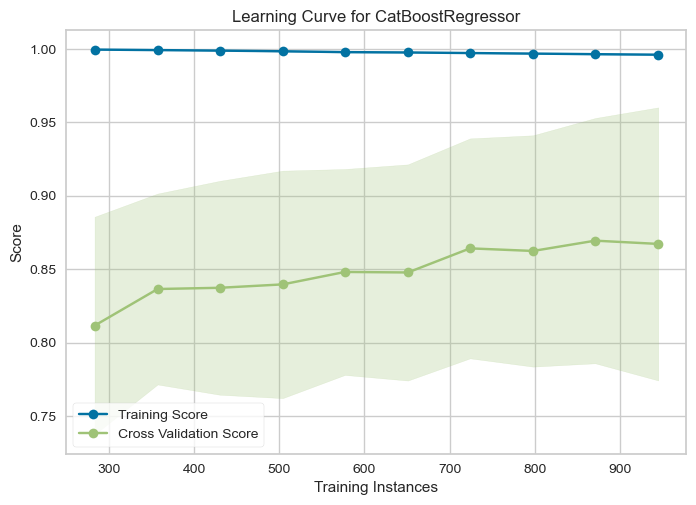

In [25]:
default.plot_model(tune_catboost, plot = 'learning') #plot learning curve for catboost model

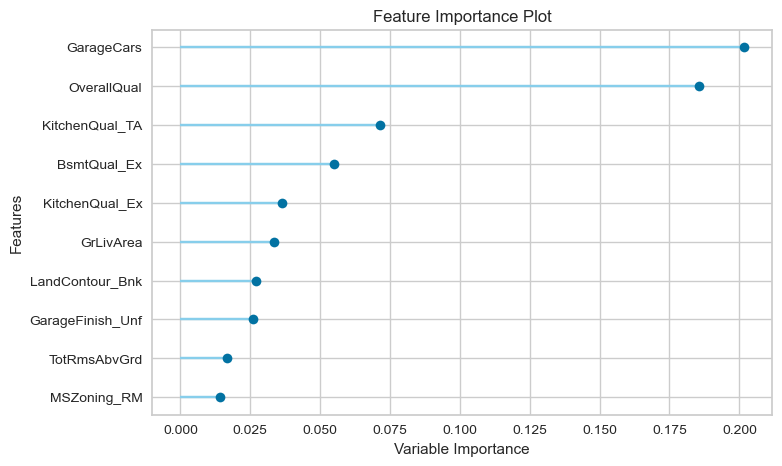

In [26]:
default.plot_model(tune_xgboost, plot = 'feature') 

#not the best performing, used to understand features

In [27]:
stacker = default.stack_models(estimator_list = top3_default) #best performer of the tuned models in RMSE (kaggle metric) 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,18189.3635,1313887730.1563,36247.5893,0.7854,0.1453,0.0982
1,13254.9698,309988144.4705,17606.4802,0.9214,0.1239,0.0857
2,21144.4696,2574567742.4852,50740.1985,0.6243,0.1663,0.1053
3,15004.1649,569477377.5090,23863.7251,0.8993,0.1251,0.0889
4,15819.5066,526607654.2686,22947.9336,0.9104,0.1195,0.0888
5,16156.8028,638188067.2599,25262.3844,0.9138,0.1405,0.0923
6,16667.5865,1690184833.2904,41111.8576,0.8327,0.1143,0.0757
7,15790.8813,516350026.1753,22723.3366,0.9275,0.1551,0.1076
8,16540.2152,822921103.1133,28686.6015,0.8853,0.1305,0.0932


In [28]:
final_stacker = default.finalize_model(stacker) #Create final model

In [29]:
#predict on validation set
validation_predictions = default.predict_model(final_stacker, data=validation)
validation.tail()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,13782.9647,412526327.6901,20310.7441,0.9379,0.1142,0.0784


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
141,1434,60,RL,93.0,10261,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,186500
142,1444,30,RL,NaN,8854,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,121000
143,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
144,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
145,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [30]:
#create submission file with example submision format
Lincoln_Whiting_final_submission = pd.read_csv('/Users/lincolnwhiting/Git Portfolio/Datasets/Housing_kaggle/sample_submission.csv')

In [31]:
Lincoln_Whiting_final_submission.head() #preview to ensure correct submission format

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [32]:
#save predictions to csv for submission to kaggle
predictions = predict_model(final_stacker, data=test)
Lincoln_Whiting_final_submission['SalePrice'] = predictions['prediction_label']
Lincoln_Whiting_final_submission.to_csv('submission.csv', index=False)
Lincoln_Whiting_final_submission.head()

,Id,SalePrice
0,1461,120044.609364
1,1462,163217.049468
2,1463,180266.059330
3,1464,189720.356456
4,1465,184366.982253
